## Data Science con python
+ Lenguaje de propósito general
+ Sencillo
+ Multiplataforma
+ Orientado a objetos

#### Pickle
Paquete std de python, permite guardar y recuperar cualquier objeto de python, ideal para prototipos.

#### Scipy
Orientada a desarrollo científico. Contiene herramientas de optimización, distribuciones de probabilidad, entre otras.

#### Scikit Learn
Orientada a ML, contiene la mayoría de los algoritmos de uso común

#### Deep Learning
TensorFlow / PyTorch

Tipos de datos:
1. Numérico
    + Contínuo
    + Entero
2. Categórico
    + Ordinal
    + No ordinal
3. Temporal
4. Booleans

In [1]:
import pandas as pd
df = pd.read_csv('ejemplo_data.csv',index_col='ID')

In [3]:
print(df.shape)
df.tail()

(5, 7)


,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
ID,,,,,,,
10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0


In [5]:
df.dtypes

Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo          int64
dtype: object

In [8]:
#object es string o mixto string-numérico
df['Activo'] = df['Activo'].astype('bool')
df['Nombre'] = df['Nombre'].astype('category')

In [9]:
df['2016'] = df['2016'].astype('float')

ValueError: could not convert string to float: '$125,000.00'

In [1]:
#función a correr por elemento, luego .apply a columna completa
def convertir(val):
    nuevo = val.replace(',','').replace('$','')
    return float(nuevo)
def porcentaje(val):
    nuevo = val.replace('%','')
    return float(nuevo)/100

In [11]:
df['2016'] = df['2016'].apply(convertir)
df['2017'] = df['2017'].apply(convertir)
df['Crecimiento'] = df['Crecimiento'].apply(porcentaje)
df.tail(2)

,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
ID,,,,,,,
24900,Andes sur,350000.0,490000.0,0.04,75,10-28-2015,True
651029,San Pablo,15000.0,12750.0,-0.15,No,2-15-2014,False


In [12]:
df['Unidades'].astype('int')

ValueError: invalid literal for int() with base 10: 'No'

In [13]:
pd.to_numeric(df['Unidades'],errors='coerce')

ID
10002     500.0
552278    700.0
23477     125.0
24900      75.0
651029      NaN
Name: Unidades, dtype: float64

In [14]:
df['Unidades'] = pd.to_numeric(df['Unidades'],errors='coerce')

In [15]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [16]:
df['Unidades'] = df['Unidades'].fillna(0)
df.tail(2)

,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
ID,,,,,,,
24900,Andes sur,350000.0,490000.0,0.04,75.0,2015-10-28,True
651029,San Pablo,15000.0,12750.0,-0.15,0.0,2014-02-15,False


### Análisis descriptivo
Datos ruidosos, incompletos, inconsistentes

In [10]:
import pandas as pd
d = {
    'Nombre' : pd.Series(['Juan','Pedro','Viviana','Rosa','Ricardo','Soledad',
                          'Ana','Diego','David','José','Julia','Andrea']),
    'Edad' : pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
    'Nota' : pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}
df = pd.DataFrame(d)

In [8]:
df['Edad'] = df['Edad'].astype(int)

In [21]:
#medidas de tendencia central
print('Edad promedio: ',df['Edad'].mean())

import numpy as np
df['Pesos'] = [1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,5/20,5/20]
wavg = np.average(df['Edad'],weights=df['Pesos'])
print('Promedio Ponderado: ',wavg)

print('Moda: ',df['Edad'].mode())
print('Mediana: ',df['Nota'].median())


Edad promedio:  31.833333333333332
Promedio Ponderado:  38.5
Moda:  0    23
1    25
2    30
dtype: int64
Mediana:  3.79


In [22]:
#rango
print('Rango nota: ', np.round(df.Nota.max()-df.Nota.min(),2))
print('Rango edad: ', np.round(df.Edad.max()-df.Edad.min(),2))

#Varianza
print('varianza nota: ', np.round(df.Nota.var(),2))
print('varianza edad: ', np.round(df.Edad.var(),2))

#std dev
print('desv. nota: ', np.round(df.Nota.std(),2))
print('desv. edad: ', np.round(df.Edad.std(),2))


Rango nota:  2.24
Rango edad:  28
varianza nota:  0.44
varianza edad:  85.24
desv. nota:  0.66
desv. edad:  9.23


In [23]:
#cuantiles
df[['Edad','Nota']].quantile([0.25,0.5,0.75])

,Edad,Nota
0.25,25.0,3.2300
0.50,29.5,3.7900
0.75,35.5,4.1325


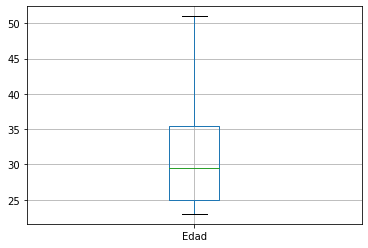

In [27]:
import matplotlib.pyplot as plt
plot = df[['Edad','Nombre']]
#Una columna para x: nombre, otra para y: edad
plot.boxplot()
plt.show()

In [29]:
#matriz de covarianza
df.cov()

,Edad,Nota,Pesos
Edad,85.242424,0.357879,0.606061
Nota,0.357879,0.437752,0.004788
Pesos,0.606061,0.004788,0.006061


### TRATAMIENTO DE VARIABLES CATEGORICAS: BINARIZACIÓN
#### sklearn.preprocessing

In [38]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
import pandas as pd
import numpy as np

In [33]:
comuna = ['Stgo','Talca','Pica','Pica','Pica','Talca','Stgo']

In [51]:
encoder = LabelBinarizer(neg_label=0,pos_label=1)
binaryEncode = encoder.fit(comuna)
print(binaryEncode.classes_)
transf = binaryEncode.transform(comuna)
transf

['Pica' 'Stgo' 'Talca']


array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [50]:
print(transf.shape)
binaryEncode

(7, 3)


LabelBinarizer()

In [59]:
#otro método, categorías enteras
encoder_comuna = LabelEncoder()
encoder_comuna.fit_transform(comuna)

array([1, 2, 0, 0, 0, 2, 1], dtype=int64)

In [53]:
encoder_comuna.classes_

array(['Pica', 'Stgo', 'Talca'], dtype='<U5')

In [62]:
#recuperar valores
[encoder_comuna.inverse_transform([i]) for i in range(len(encoder_comuna.classes_))]

[array(['Pica'], dtype='<U5'),
 array(['Stgo'], dtype='<U5'),
 array(['Talca'], dtype='<U5')]

In [63]:
color = ['rojo','verde','rojo','amarillo','azul','verde']
comuna = ['Santiago','Talca','Curicó','Curicó','Talca','Santiago']

In [65]:
zipped = list(zip(comuna,color))

In [66]:
df = pd.DataFrame(zipped,columns = ['comuna','color'])

In [67]:
encoder = OneHotEncoder()
com_onehot = encoder.fit_transform(df)

In [68]:
encoder.categories_

[array(['Curicó', 'Santiago', 'Talca'], dtype=object),
 array(['amarillo', 'azul', 'rojo', 'verde'], dtype=object)]

In [71]:
#cada fila es un concat de un vector magnitud 1 por cada columna
com_onehot.toarray()

array([[0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1.]])

### Escalamiento y normalización
+ Escalamiento minmax: transformación lineal de los datos originales

In [73]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [75]:
x = np.array([1.1, 2.5, 3.2, 1.0, 4.5])

newmin,newmax = (0,1)
x_scaled = (x-np.min(x))/ (np.max(x)-np.min(x))* (newmax-newmin)+newmin
x_scaled

array([0.02857143, 0.42857143, 0.62857143, 0.        , 1.        ])

In [76]:
#lo mismo con sklearn:
minmax = MinMaxScaler(feature_range=[0,1])
xnew = minmax.fit_transform(np.asanyarray(x).reshape(-1,1))
xnew

array([[0.02857143],
       [0.42857143],
       [0.62857143],
       [0.        ],
       [1.        ]])

In [78]:
#normalización Z (media y desviación std)
from sklearn.preprocessing import StandardScaler

df2 = pd.DataFrame(x)
stdscale = StandardScaler()
stdscale.fit_transform(df2)

array([[-1.0314877 ],
       [ 0.03033787],
       [ 0.56125066],
       [-1.10733238],
       [ 1.54723154]])

### Visualización: nube de puntos gaussianos

In [1]:
from scipy.stats import multivariate_normal as multinorm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
data1 = multinorm(mean=[0,0],cov=1).rvs(1000)
data1 = np.hstack([data1,np.zeros((data1.shape[0],1))])
data1 = pd.DataFrame(data1,columns=['x','y','c'])

data2 = multinorm(mean=[3,3],cov=1).rvs(1000)
data2 = np.hstack([data2,np.zeros((data1.shape[0],1))])
data2 = pd.DataFrame(data2,columns=['x','y','c'])

data = np.concatenate([data1,data2],axis=0)
data = pd.DataFrame(data, columns=['x','y','c'])

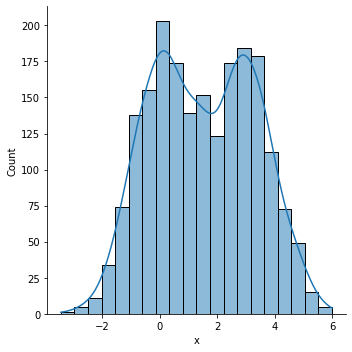

In [90]:
sns.displot(data['x'],bins=20,kde=True,rug=False)

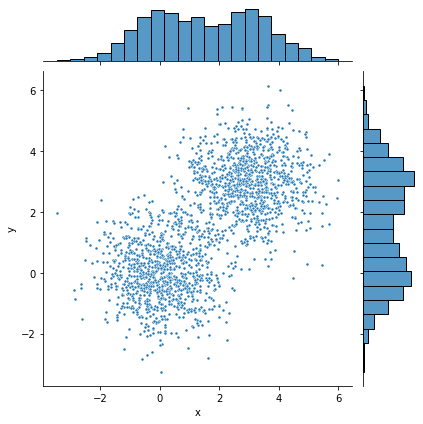

In [104]:
sns.jointplot(x='x',y='y',data=data,marker='.')

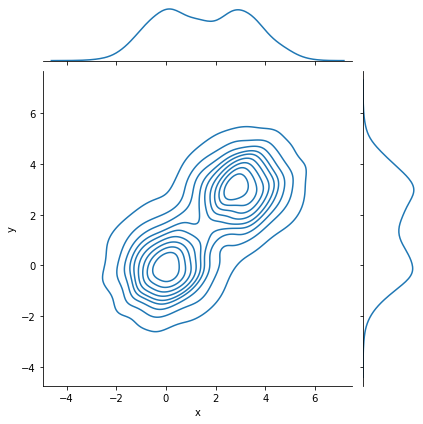

In [100]:
sns.jointplot(x='x',y='y',data=data,kind='kde', palette='mako')

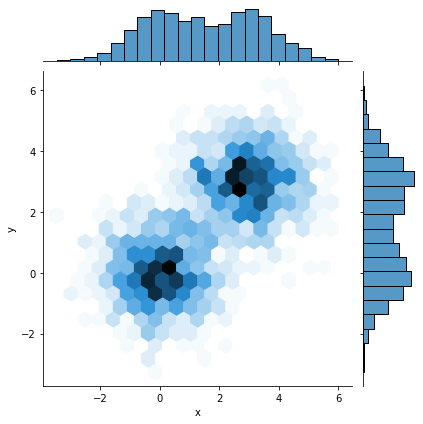

In [103]:
ax = sns.jointplot(x='x',y='y',data=data,kind='hex')
plt.show()